In [262]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [263]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [264]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [265]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv

In [330]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


Construction du Y 

In [267]:
# #NbgoalsFullTime 10n23n24n
tab =data.values
for i in tab:
    if i[10]>2.5:
        i[24] = 2
    elif i[10]>1.5:
        i[24] = 1
    elif i[14]>0.5:
        i[24] = 0
    else:
         i[24] = 0
a = tab[:,24]
a.astype(int)

array([2, 1, 0, ..., 1, 2, 1])

In [268]:
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,2
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,2
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,2
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,2


In [271]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,...,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,0,...,1,0,1.214286,1.714286,0.500000,0.750000,1.392857,1.750000,0.535714,0.928571
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,0,...,1,0,1.343750,1.593750,0.625000,0.687500,1.625000,1.250000,0.718750,0.343750
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1,...,0,0,1.428571,1.678571,0.535714,0.642857,1.607143,1.571429,0.892857,0.535714
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,...,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,...,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,...,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,...,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,...,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0,...,2,0,0.806452,0.774194,0.419355,0.483871,1.354839,1.903226,0.612903,0.741935


# Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [272]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [323]:
y = data_x.buts_class
np.unique(y)

array([0, 1, 2], dtype=int64)

In [335]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
3


array([2, 1, 2, ..., 2, 2, 2])

In [338]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [339]:
model = create_model()
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_134 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_135 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_136 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_137 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_138 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_139 (Dense)            (None, 128)             

In [340]:
save = ModelCheckpoint('model_buts.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [341]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=500,
                    callbacks = [save])

Train on 9238 samples, validate on 2310 samples
Epoch 1/500
8820/9238 [===========================>..] - ETA: 0s - loss: 10.7289 - accuracy: 0.3853
Epoch 00001: val_accuracy improved from -inf to 0.41429, saving model to model_buts.h5
9238/9238 [==============================] - 2s 245us/sample - loss: 10.2959 - accuracy: 0.3884 - val_loss: 1.1096 - val_accuracy: 0.4143
Epoch 2/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.1064 - accuracy: 0.4673
Epoch 00002: val_accuracy did not improve from 0.41429
9238/9238 [==============================] - 1s 125us/sample - loss: 1.1060 - accuracy: 0.4687 - val_loss: 1.0746 - val_accuracy: 0.4108
Epoch 3/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0598 - accuracy: 0.4909
Epoch 00003: val_accuracy did not improve from 0.41429
9238/9238 [==============================] - 1s 119us/sample - loss: 1.0598 - accuracy: 0.4909 - val_loss: 1.0953 - val_accuracy: 0.4061
Epoch 4/500
8910/9238 [======================

9000/9238 [============================>.] - ETA: 0s - loss: 1.0313 - accuracy: 0.5051
Epoch 00028: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 127us/sample - loss: 1.0311 - accuracy: 0.5053 - val_loss: 1.0336 - val_accuracy: 0.4965
Epoch 29/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0314 - accuracy: 0.5049
Epoch 00029: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 144us/sample - loss: 1.0312 - accuracy: 0.5053 - val_loss: 1.0336 - val_accuracy: 0.4965
Epoch 30/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0316 - accuracy: 0.5046
Epoch 00030: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 124us/sample - loss: 1.0309 - accuracy: 0.5053 - val_loss: 1.0326 - val_accuracy: 0.4965
Epoch 31/500
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0283 - accuracy: 0.5067
Epoch 00031: val_accuracy did not imp

8820/9238 [===========================>..] - ETA: 0s - loss: 1.0314 - accuracy: 0.5052
Epoch 00056: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 132us/sample - loss: 1.0314 - accuracy: 0.5053 - val_loss: 1.0405 - val_accuracy: 0.4965
Epoch 57/500
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0278 - accuracy: 0.5078
Epoch 00057: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 118us/sample - loss: 1.0297 - accuracy: 0.5054 - val_loss: 1.0358 - val_accuracy: 0.4965
Epoch 58/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0298 - accuracy: 0.5045
Epoch 00058: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 146us/sample - loss: 1.0294 - accuracy: 0.5053 - val_loss: 1.0351 - val_accuracy: 0.4965
Epoch 59/500
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0292 - accuracy: 0.5056
Epoch 00059: val_accuracy did not imp

9000/9238 [============================>.] - ETA: 0s - loss: 1.0286 - accuracy: 0.5056
Epoch 00084: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 236us/sample - loss: 1.0288 - accuracy: 0.5053 - val_loss: 1.0345 - val_accuracy: 0.4965
Epoch 85/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0291 - accuracy: 0.5057
Epoch 00085: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 237us/sample - loss: 1.0294 - accuracy: 0.5053 - val_loss: 1.0372 - val_accuracy: 0.4965
Epoch 86/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0304 - accuracy: 0.50 - ETA: 0s - loss: 1.0298 - accuracy: 0.5051
Epoch 00086: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 244us/sample - loss: 1.0296 - accuracy: 0.5053 - val_loss: 1.0324 - val_accuracy: 0.4965
Epoch 87/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0298 - accuracy: 0.

9090/9238 [============================>.] - ETA: 0s - loss: 1.0309 - accuracy: 0.5056
Epoch 00111: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 247us/sample - loss: 1.0312 - accuracy: 0.5052 - val_loss: 1.0369 - val_accuracy: 0.4965
Epoch 112/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0340 - accuracy: 0.5050
Epoch 00112: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 243us/sample - loss: 1.0338 - accuracy: 0.5053 - val_loss: 1.0354 - val_accuracy: 0.4965
Epoch 113/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0300 - accuracy: 0.5057
Epoch 00113: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 241us/sample - loss: 1.0303 - accuracy: 0.5053 - val_loss: 1.0347 - val_accuracy: 0.4965
Epoch 114/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0312 - accuracy: 0.5044
Epoch 00114: val_accuracy did not 

Epoch 139/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0355 - accuracy: 0.5059
Epoch 00139: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 243us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 140/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0365 - accuracy: 0.5045
Epoch 00219: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 248us/sample - loss: 1.0359 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 220/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0352 - accuracy: 0.5062
Epoch 00220: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 257us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0425 - val_accuracy: 0.4965
Epoch 221/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0354 - accuracy: 0.5059
Epoch 00221: val_acc

Epoch 246/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0361 - accuracy: 0.5051
Epoch 00246: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 250us/sample - loss: 1.0359 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 247/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0358 - accuracy: 0.5054
Epoch 00247: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 235us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 248/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0367 - accuracy: 0.5041
Epoch 00248: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 235us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0426 - val_accuracy: 0.4965
Epoch 249/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0360 - accuracy: 0.5051
Epoch 00249: val_acc

Epoch 274/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0355 - accuracy: 0.5058
Epoch 00274: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 3s 277us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0425 - val_accuracy: 0.4965
Epoch 275/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0343 - accuracy: 0.5076
Epoch 00275: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 3s 282us/sample - loss: 1.0359 - accuracy: 0.5053 - val_loss: 1.0425 - val_accuracy: 0.4965
Epoch 276/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0357 - accuracy: 0.5056
Epoch 00276: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 3s 285us/sample - loss: 1.0359 - accuracy: 0.5053 - val_loss: 1.0426 - val_accuracy: 0.4965
Epoch 277/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0354 - accuracy: 0.5058
Epoch 00277: val_acc

Epoch 383/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0354 - accuracy: 0.5056
Epoch 00383: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 155us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0422 - val_accuracy: 0.4965
Epoch 384/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0351 - accuracy: 0.5061
Epoch 00384: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 171us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 385/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0370 - accuracy: 0.5033
Epoch 00385: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 179us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0422 - val_accuracy: 0.4965
Epoch 386/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0349 - accuracy: 0.5067
Epoch 00386: val_acc

Epoch 411/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0358 - accuracy: 0.5053
Epoch 00411: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 163us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0426 - val_accuracy: 0.4965
Epoch 412/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0350 - accuracy: 0.5063 ETA: 1s
Epoch 00412: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 157us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0423 - val_accuracy: 0.4965
Epoch 413/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0375 - accuracy: 0.5030
Epoch 00413: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 163us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 414/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0361 - accuracy: 0.5048
Epoch 00414:

Epoch 439/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0359 - accuracy: 0.5051
Epoch 00439: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 161us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0425 - val_accuracy: 0.4965
Epoch 440/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0347 - accuracy: 0.5065 ETA: 0s - loss: 1.0328 - accuracy: 0.
Epoch 00440: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 166us/sample - loss: 1.0356 - accuracy: 0.5053 - val_loss: 1.0423 - val_accuracy: 0.4965
Epoch 441/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0361 - accuracy: 0.5048
Epoch 00441: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 2s 168us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0422 - val_accuracy: 0.4965
Epoch 442/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0359 -

Epoch 00466: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 138us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 467/500
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0346 - accuracy: 0.5069
Epoch 00467: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 117us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0423 - val_accuracy: 0.4965
Epoch 468/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0357 - accuracy: 0.5054
Epoch 00468: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 121us/sample - loss: 1.0358 - accuracy: 0.5053 - val_loss: 1.0425 - val_accuracy: 0.4965
Epoch 469/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0355 - accuracy: 0.5057
Epoch 00469: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 139us/sample - los

9090/9238 [============================>.] - ETA: 0s - loss: 1.0358 - accuracy: 0.5052
Epoch 00494: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 139us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 495/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0364 - accuracy: 0.5043
Epoch 00495: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 136us/sample - loss: 1.0357 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 496/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0341 - accuracy: 0.5072
Epoch 00496: val_accuracy did not improve from 0.49654
9238/9238 [==============================] - 1s 133us/sample - loss: 1.0356 - accuracy: 0.5053 - val_loss: 1.0424 - val_accuracy: 0.4965
Epoch 497/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0355 - accuracy: 0.5056
Epoch 00497: val_accuracy did not 

Text(0, 0.5, 'Accuracy')

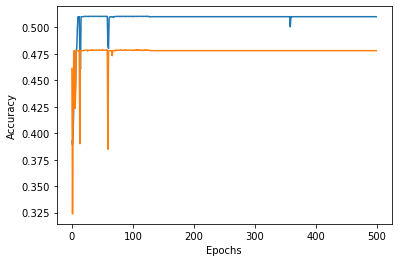

In [279]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [337]:
unique = x_prediction.values

results = []
zero =[]
un = []
deux = []
i = 0
x_train.shape
predictions_final = model.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 3)

In [325]:
model.load_weights("model_buts.h5")

In [326]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    print(result,predictions_final)

2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196

2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196 0.5026909 ]]
2 [[0.25411713 0.24319196

In [313]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'< 0,5 buts':zero,'< 1,5 buts':un,'< 2,5 buts':deux}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,0.25,0.24,0.5
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,0.25,0.24,0.5
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,0.25,0.24,0.5
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,0.25,0.24,0.5
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,0.25,0.24,0.5
...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.25,0.24,0.5
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.25,0.24,0.5
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.25,0.24,0.5
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.25,0.24,0.5


In [314]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.json')

In [315]:
finished = []
scheduled = []

In [316]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [317]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","< 0,5 buts","< 1,5 buts","< 2,5 buts"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [318]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,0.25,0.24,0.5
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,0.25,0.24,0.5
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,0.25,0.24,0.5
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,0.25,0.24,0.5
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,0.25,0.24,0.5
...,...,...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,0.25,0.24,0.5
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,0.25,0.24,0.5
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,0.25,0.24,0.5
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,0.25,0.24,0.5


In [319]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,0.25,0.24,0.5
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,0.25,0.24,0.5
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,0.25,0.24,0.5
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,0.25,0.24,0.5
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,0.25,0.24,0.5
...,...,...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.25,0.24,0.5
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.25,0.24,0.5
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.25,0.24,0.5
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.25,0.24,0.5


In [320]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [321]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')